**lendo arquivos**


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
bitcoin = pd.read_csv('bitcoin.csv')
eth = pd.read_csv('ethereum.csv')
liite = pd.read_csv('litecoin.csv')
zec = pd.read_csv('zec.csv')

# ***Examinando Bitcoin***

In [3]:
bitcoin.head()
bitcoin = bitcoin.sort_values(by=['Date'])

In [4]:
bitcoin.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,2.275000e+03,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000
mean,1.019030e+12,12460.128769,12842.533658,12047.332747,12480.412919,3313.394970
std,7.544657e+11,16294.159457,16781.632371,15739.732008,16307.492821,3955.238245
min,1.444277e+09,0.000000,245.000000,0.000000,243.600000,0.000000
25%,1.493395e+09,1343.215000,1372.500000,1313.235000,1351.295000,1099.865049
50%,1.542514e+12,7148.630000,7321.680000,6895.130000,7153.720000,2014.052226
75%,1.591632e+12,10999.750000,11427.385000,10652.320000,11007.715000,3864.771560
max,1.640750e+12,68525.750000,69000.000000,66262.480000,68525.750000,54142.433523


<AxesSubplot:title={'center':'Distribuição de valores'}, xlabel='X'>

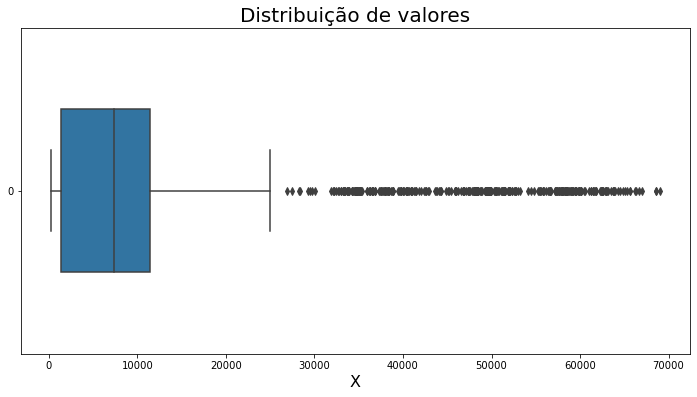

In [5]:
ax = sns.boxplot(data=bitcoin.High, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de valores', fontsize=20)
ax.set_xlabel('X', fontsize=16)
ax

[Text(1, 0, 'Open'),
 Text(2, 0, 'High'),
 Text(3, 0, 'Low'),
 Text(4, 0, 'Close'),
 Text(5, 0, 'Volume')]

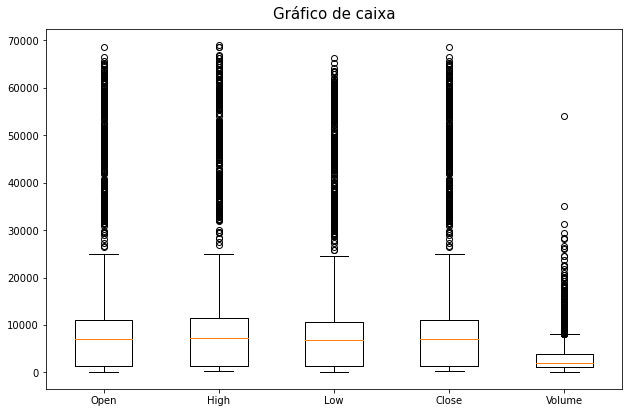

In [6]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0, 0,1,1])

eixo.boxplot(bitcoin.drop(['Date','Symbol','Unix Timestamp'], axis=1))
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(bitcoin.drop(['Date','Symbol','Unix Timestamp'], axis=1).columns)

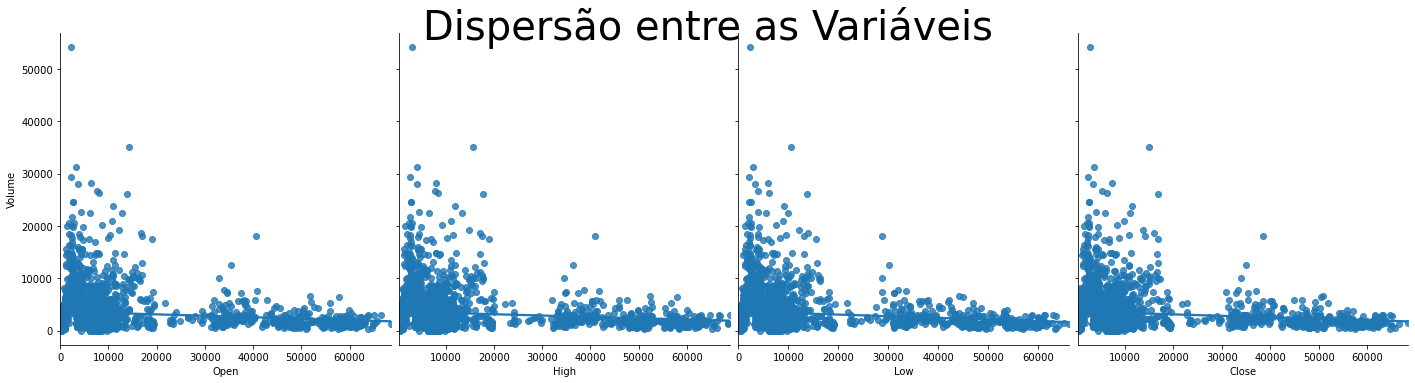

In [7]:
ax = sns.pairplot(bitcoin, y_vars = 'Volume', x_vars = ['Open','High', 'Low','Close'], kind = 'reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=40, y=1.05)
ax

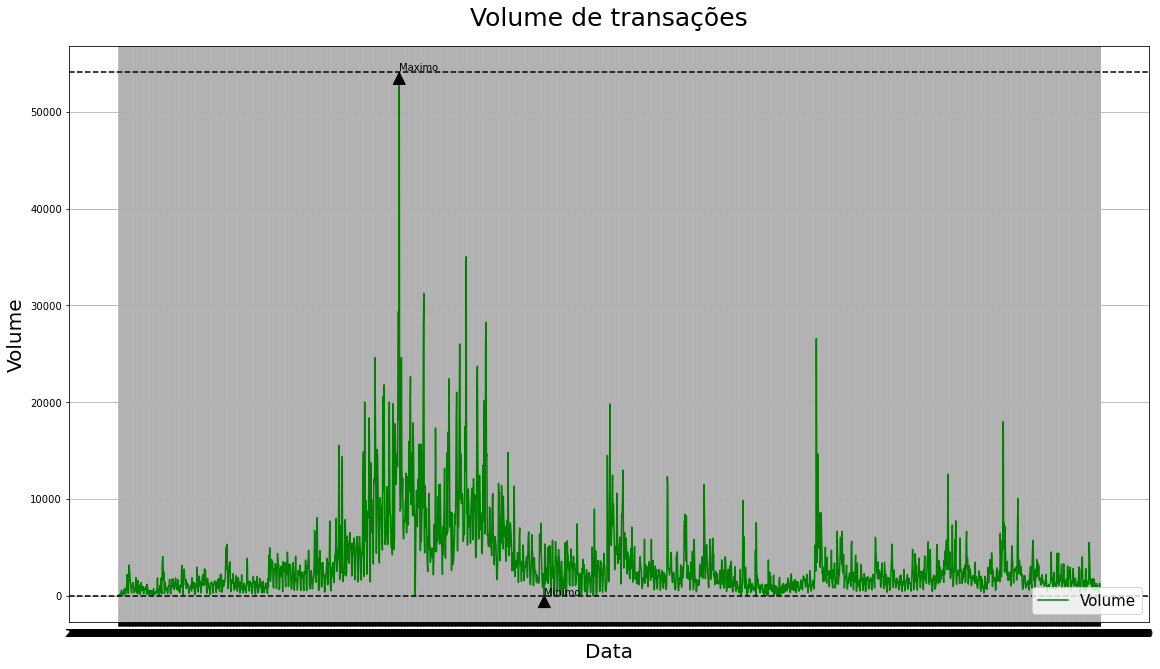

In [8]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0,0,1,1])

eixo.plot(bitcoin['Date'], bitcoin['Volume'], color = 'g')
eixo.set_title('Volume de transações', fontsize=25, pad = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.set_ylabel('Volume' ,fontsize = 20)
eixo.legend(['Volume'], loc = 'lower right', fontsize = 15)
eixo.grid(True)


x1 = bitcoin['Date'][bitcoin['Volume'].idxmax()]
y1 = max(bitcoin['Volume']-50)


x2 = bitcoin['Date'][bitcoin['Volume'].idxmax()]
y2 = max(bitcoin['Volume']+100)

eixo.annotate('Maximo', xy = (x1,y1),
             xytext= (x2,y2), arrowprops= dict(facecolor='k'))

x1 = bitcoin['Date'][bitcoin['Volume'].idxmin()]
y1 = min(bitcoin['Volume'])


x2 = bitcoin['Date'][bitcoin['Volume'].idxmin()]
y2 = min(bitcoin['Volume'])

eixo.annotate('Minimo', xy = (x1,y1),
             xytext= (x2,y2), arrowprops= dict(facecolor='k'))

eixo.axhline(max(bitcoin['Volume']), color = 'k', linestyle = '--' )
eixo.axhline(min(bitcoin['Volume']), color = 'k', linestyle = '--' )

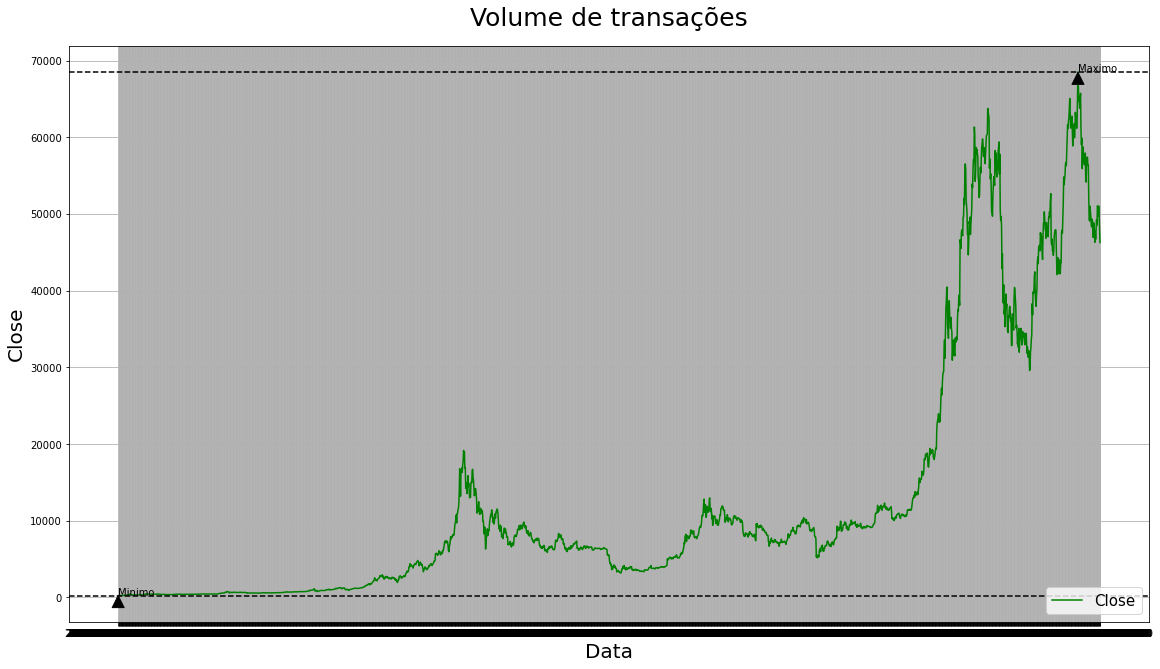

In [9]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0,0,1,1])

eixo.plot(bitcoin['Date'], bitcoin['Close'], color = 'g')
eixo.set_title('Valor moeda no dia', fontsize=25, pad = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.set_ylabel('Close' ,fontsize = 20)
eixo.legend(['Close'], loc = 'lower right', fontsize = 15)
eixo.grid(True)


x1 = bitcoin['Date'][bitcoin['Close'].idxmax()]
y1 = max(bitcoin['Close']-50)


x2 = bitcoin['Date'][bitcoin['Close'].idxmax()]
y2 = max(bitcoin['Close']+100)

eixo.annotate('Maximo', xy = (x1,y1),
             xytext= (x2,y2), arrowprops= dict(facecolor='k'))

x1 = bitcoin['Date'][bitcoin['Close'].idxmin()]
y1 = min(bitcoin['Close'])


x2 = bitcoin['Date'][bitcoin['Close'].idxmin()]
y2 = min(bitcoin['Close'])

eixo.annotate('Minimo', xy = (x1,y1),
             xytext= (x2,y2), arrowprops= dict(facecolor='k'))

eixo.axhline(max(bitcoin['Close']), color = 'k', linestyle = '--' )
eixo.axhline(min(bitcoin['Close']), color = 'k', linestyle = '--' )

## Analise comparativa em um gráfico

In [22]:
bitcoin = bitcoin.sort_values(by=['Date'])
eth = eth.sort_values(by=['Date'])
liite = liite.sort_values(by=['Date'])
zec = zec.sort_values(by=['Date'])

In [23]:
bitcoin.Close = np.log(bitcoin.Close)
eth.Close = np.log(eth.Close)
liite.Close = np.log(liite.Close)
zec.Close = np.log(zec.Close)

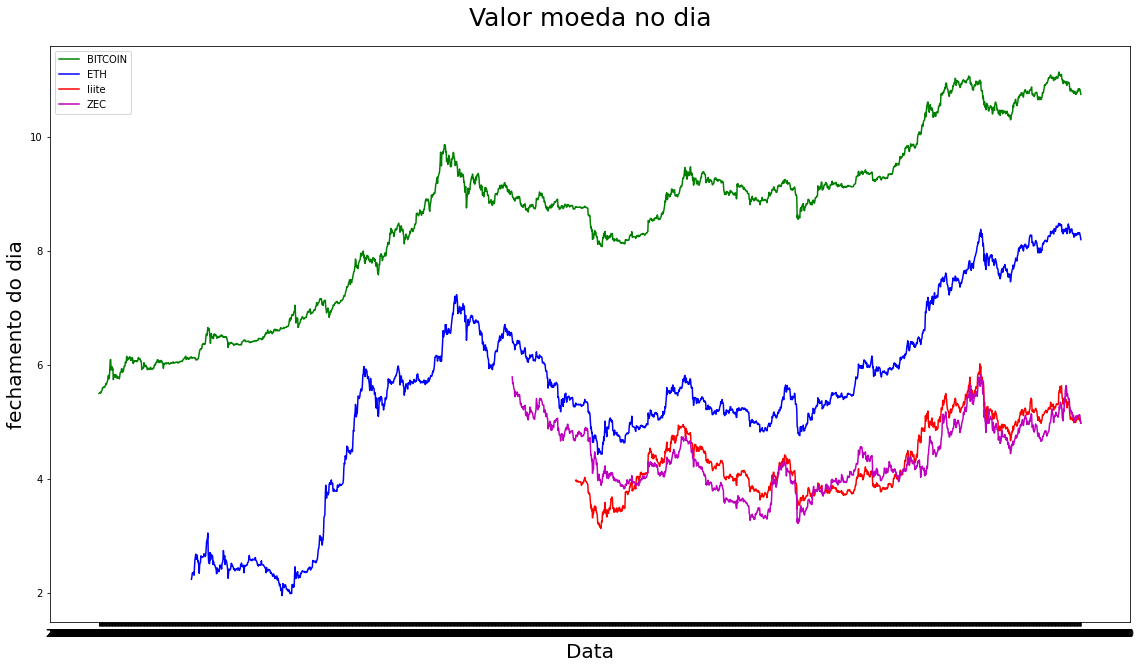

In [45]:
fig = plt.figure(figsize=(15,8))

# GRAFICO BITCOIN
eixoB = fig.add_axes([0,0,1,1])

eixoB.plot(bitcoin['Date'], bitcoin['Close'], color = 'g', label='BITCOIN')
eixoB.plot(eth['Date'], eth['Close'], color = 'b', label='ETH')
eixoB.plot(liite['Date'], liite['Close'], color = 'r',label='liite')
eixoB.plot(zec['Date'], zec['Close'], color = 'm', label='ZEC')
eixoB.set_title('Valor moeda no dia', fontsize=25, pad = 20)
eixoB.set_xlabel('Data', fontsize = 20)
eixoB.set_ylabel('fechamento do dia' ,fontsize = 20)

leg = eixoB.legend();

